# Multiple games example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import koth_stats.stats as ks

from common import display_figure, generate_random_game

Generate dummy game data.

In [10]:
nb_games = 100 # > 5
nb_players = 3
nb_transitions = 7

ks_services: list[ks.KothStatService] = []
for i in range(nb_games):
    players, transitions_df = generate_random_game(nb_players, nb_transitions)
    ks_services.append(ks.KothStatService(players, transitions_df))

Small plot

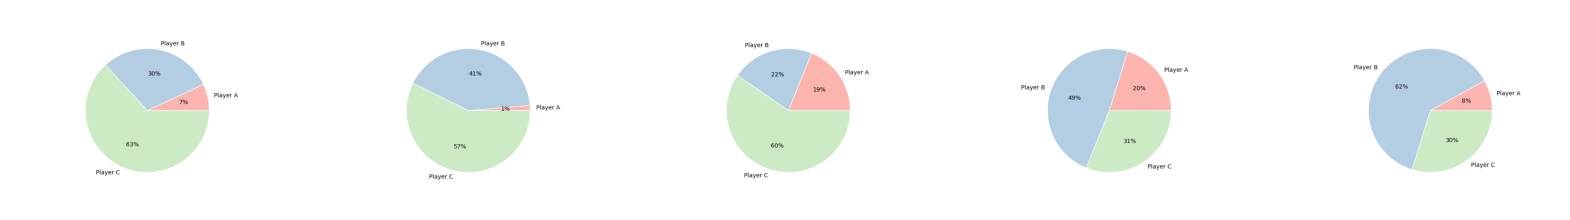

In [15]:
ncols = 5
nrows = 1
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 6))

for ax, ks_service in zip(axs.flat, ks_services):
    display_figure(ks_service.total_reign_time.plot(), ax=ax)


Time plots of the scores.

In [16]:
names = []
points = []
games = []

for game_id, ks_service in enumerate(ks_services):
    points_df = ks_service.points_df()
    
    names += list(points_df.index)
    points += list(points_df.Points)
    games += [game_id for _ in range(nb_players)]

In [17]:
df_scores = pd.DataFrame({
    "Name": names,
    "Points": points,
    "Game": games
})

df_scores['Game'].apply(int)

df_scores

,Name,Points,Game
0,Player C,163,0
1,Player B,80,0
2,Player A,47,0
3,Player C,184,1
4,Player B,115,1
...,...,...,...
295,Player C,110,98
296,Player A,0,98
297,Player A,220,99
298,Player B,74,99


<AxesSubplot:xlabel='Game', ylabel='Points'>

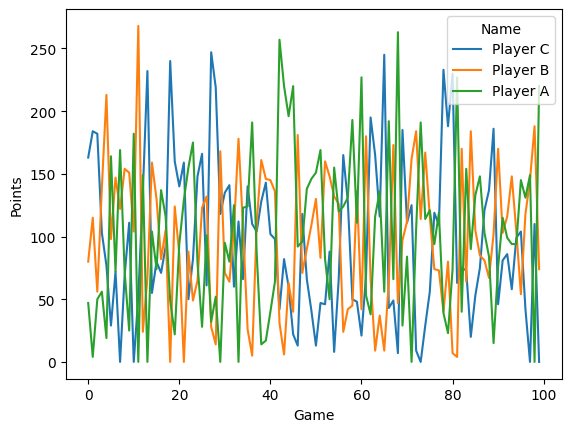

In [18]:
sns.lineplot(data=df_scores, x="Game", y = "Points", hue="Name")